In [83]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
sns.set()

In [2]:
data = pd.read_excel("Concrete_Data.xls")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [4]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


The concrete compressive strength is the regression problem

In [5]:
data.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

C:\Users\dhaga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dhaga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dhaga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

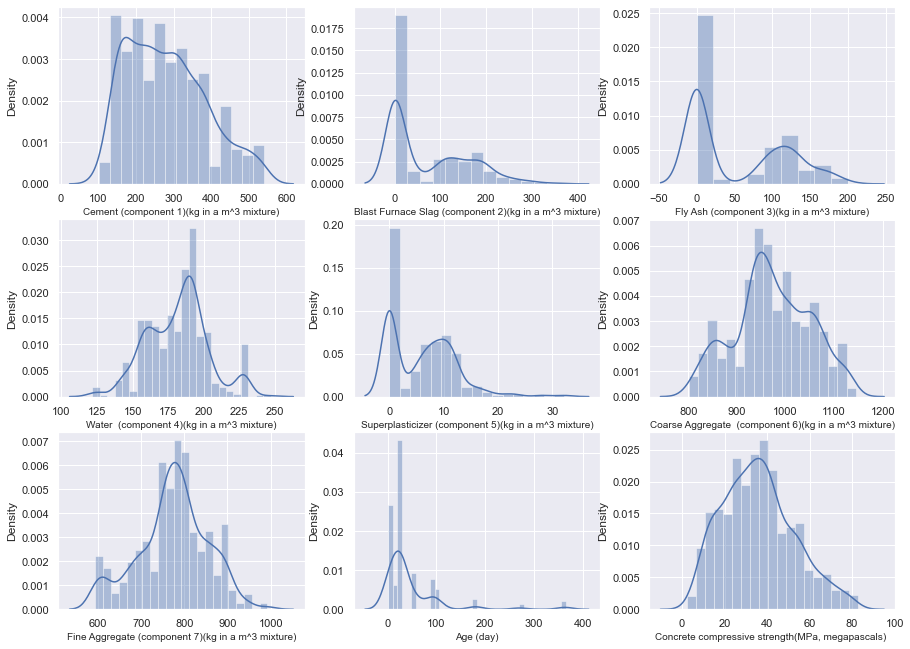

In [12]:
plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in data.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

## Data Transformation

In [13]:
X = data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)

In [14]:
y = data['Concrete compressive strength(MPa, megapascals) ']

In [15]:
#add 1 to each value in everycolumn so that we don't get exception while calculationg the log for value 0

for column in X.columns:
    X[column]+=1
    X[column] = np.log(X[column])

C:\Users\dhaga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dhaga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dhaga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

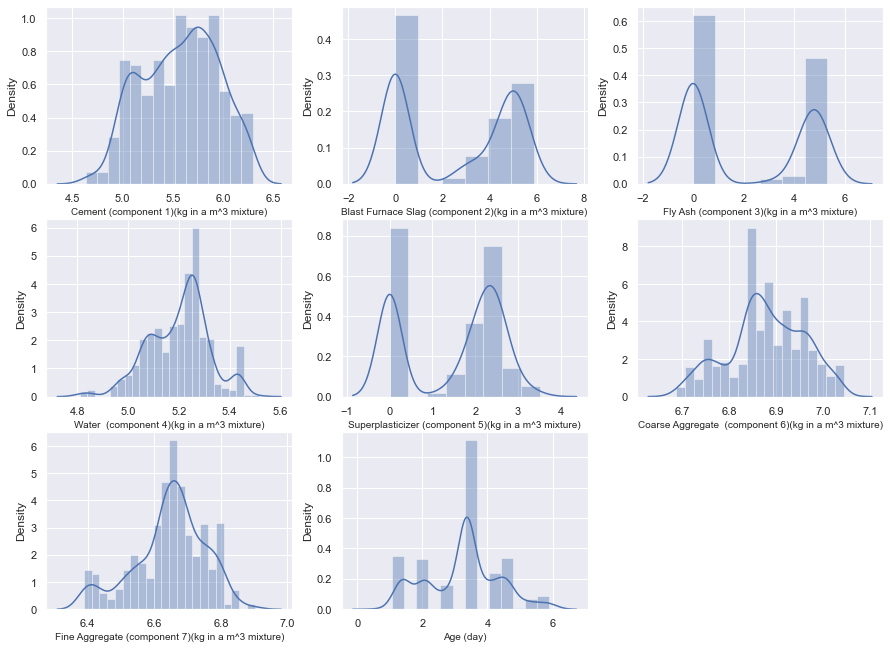

In [16]:
import numpy as np

plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.distplot(X[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

C:\Users\dhaga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dhaga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dhaga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dhaga\anaconda3\lib\si

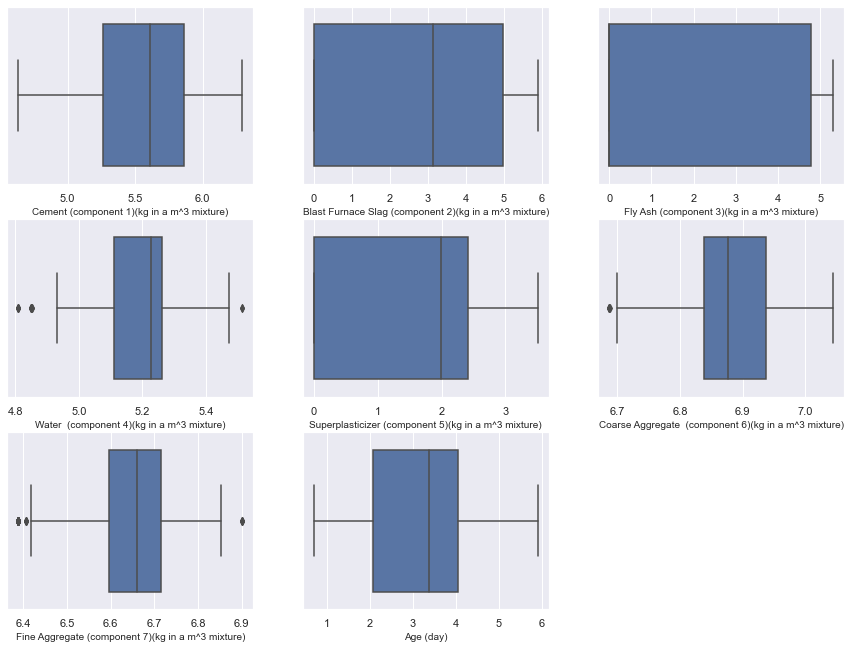

In [18]:
# Outliers

plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    #data[column]+=1
    sns.boxplot((X[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

C:\Users\dhaga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dhaga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dhaga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dhaga\anacond

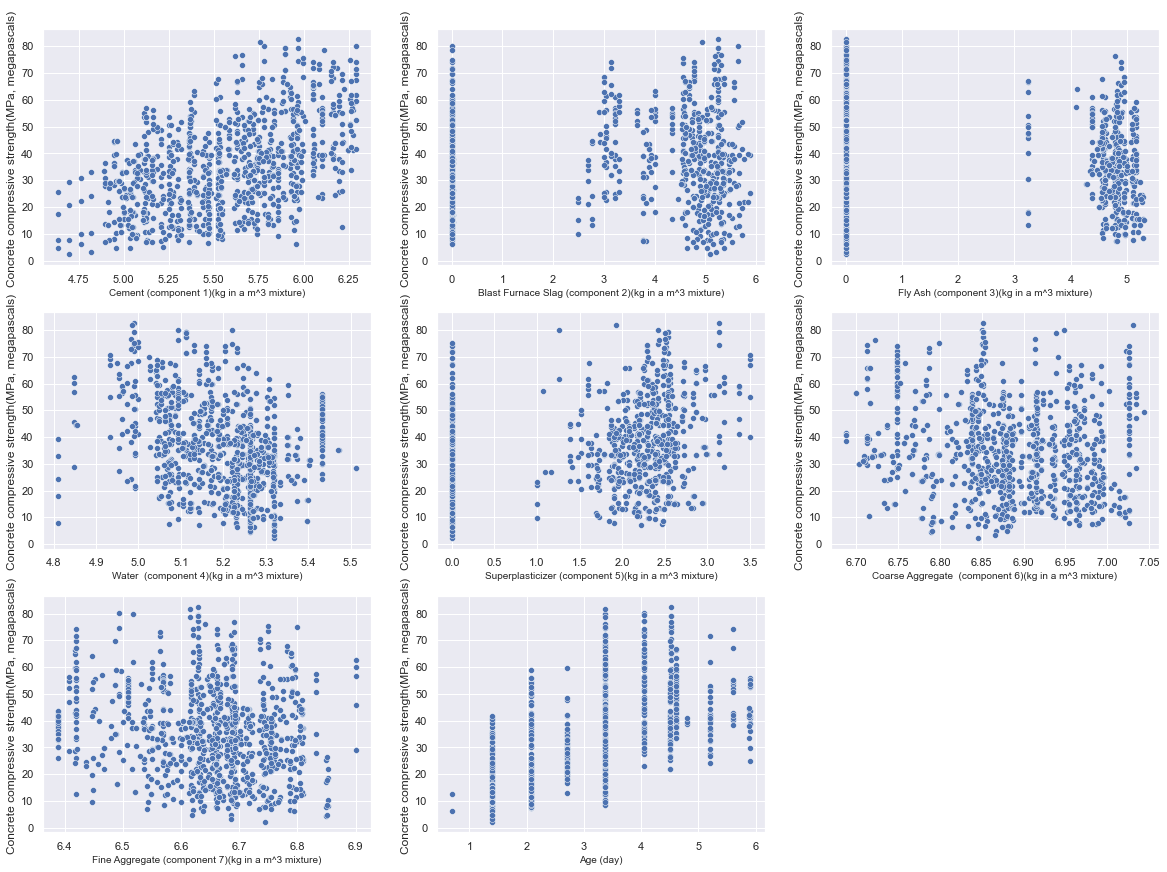

In [19]:
# Relation of features with target column
plot.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.scatterplot(X[column],y)
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

The relationship doesn't look linear. Will try using Linear Regression and see how it works.
Will also use Random forest regressor and compare our results from both the models.

In [20]:
# let's check for correaltion using heatmap

<AxesSubplot:>

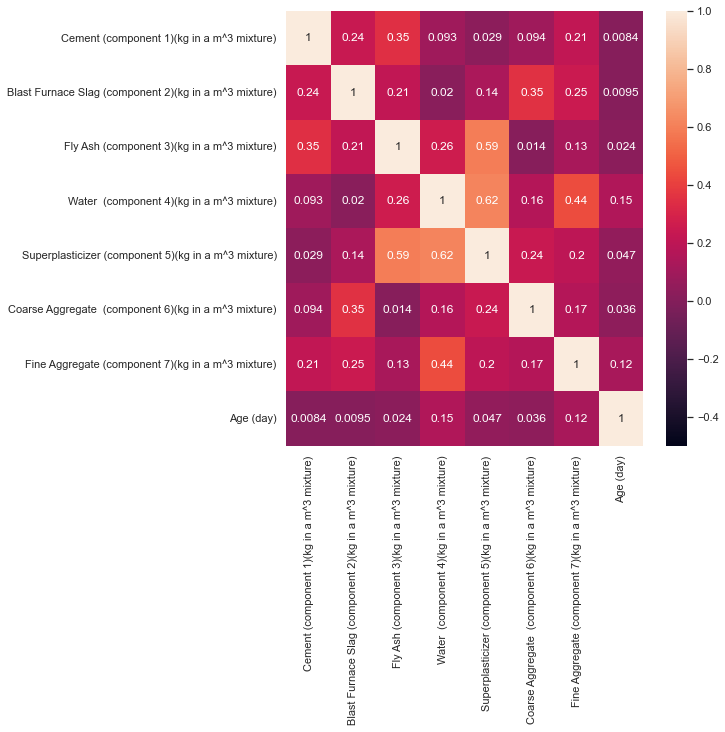

In [21]:
plot.figure(figsize=(8,8))
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(X.corr().abs(), vmin = -0.5,vmax = 1,annot=True) #matplotlib  3.0.3 , ther is an issue with 3.1.1 , annotation gets cut from top and bottom


None of our columns seem to be correlated.

In [23]:
scalar = StandardScaler()

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=1 / 3, random_state=36,)

x_train = pd.DataFrame(scalar.fit_transform(x_train),columns = x_train.columns, index=x_train.index )
x_test = pd.DataFrame(scalar.fit_transform(x_test),columns = x_test.columns, index=x_test.index)

In [25]:
x_test

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
377,0.960235,-1.077416,-0.927142,1.461699,-1.309462,0.422971,-0.080896,0.733205
520,0.226739,0.074452,1.152025,-0.063084,0.320583,-1.710492,0.392817,-1.637907
950,0.591182,-1.077416,1.142764,0.827112,0.846976,-2.315844,0.290598,0.130105
51,-0.822590,1.104634,-0.927142,1.971152,-1.309462,-0.475799,-1.318071,1.764422
724,0.455642,-1.077416,-0.927142,0.526096,-1.309462,0.525535,0.733587,1.150717
...,...,...,...,...,...,...,...,...
799,1.907201,-1.077416,-0.927142,-0.349520,-1.309462,1.812774,-2.169721,-1.637907
963,-1.438723,1.195682,-0.927142,-0.310763,0.924849,1.195265,-1.249689,0.130105
583,-0.552804,1.315243,-0.927142,0.245696,-1.309462,0.097550,-1.046029,0.130105
567,-0.643528,0.965672,-0.927142,0.245696,-1.309462,1.273482,-0.119429,-1.019284


In [26]:
x_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
945,-1.660063,0.978814,1.074523,0.883007,0.600297,-0.720495,-0.197566,0.103867
188,-0.441391,-1.050507,1.046791,0.408879,0.228503,-0.039058,1.146708,1.233730
529,0.821150,0.191473,1.204810,-1.320189,0.901633,-0.369026,0.373276,0.715741
917,-1.512215,1.093087,-0.887777,-0.442949,-0.288331,0.381316,0.682194,0.103867
117,0.462066,1.259928,-0.887777,-0.225249,0.715543,0.956923,-2.137048,0.103867
...,...,...,...,...,...,...,...,...
986,0.097179,0.883266,0.977050,1.267716,0.750775,-0.886086,-1.156662,0.103867
936,-0.274578,0.827292,0.920958,2.638249,0.442941,-1.616721,-0.943922,0.103867
926,-1.274678,1.176068,1.268197,0.953895,0.833034,-2.110647,-1.152551,0.103867
610,-0.284604,-1.050507,-0.887777,0.571642,-1.236505,-0.027117,1.302585,2.399529


#### Apply linear regression

In [28]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.8019238138745556
0.8011992445338478


#### Apply RandomForest regressor

In [32]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

0.9813925218395004
0.9049607625355387


##### Train score > Test score hence overfitting

In [61]:
grid_param = {
    "n_estimators" : [5,10,50,100,150,200,300,500],
    "max_features":["auto","sqrt"],
    "max_depth" : range(1,10),
    "min_samples_leaf" : range(1,10),
    }

In [62]:
rf_cv = RandomForestRegressor()

In [63]:
grid_search_rf = GridSearchCV(estimator=rf_cv,param_grid=grid_param,cv=10, n_jobs=-1,verbose=1)

In [64]:
grid_search_rf.fit(x_train,y_train)

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': range(1, 10),
                         'n_estimators': [5, 10, 50, 100, 150, 200, 300, 500]},
             verbose=1)

In [65]:
grid_search_rf.best_estimator_

RandomForestRegressor(max_depth=9, n_estimators=150)

In [73]:
rf_new_1 = RandomForestRegressor(max_depth=9, n_estimators=150,max_features='auto')

In [74]:
rf_new_1.fit(x_train,y_train)
print(rf_new_1.score(x_train,y_train))
print(rf_new_1.score(x_test,y_test))

0.9723384160486214
0.8985811688372733


In [86]:
import shap

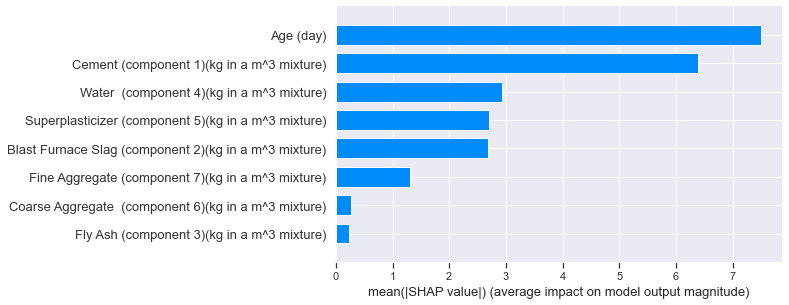

In [87]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar")

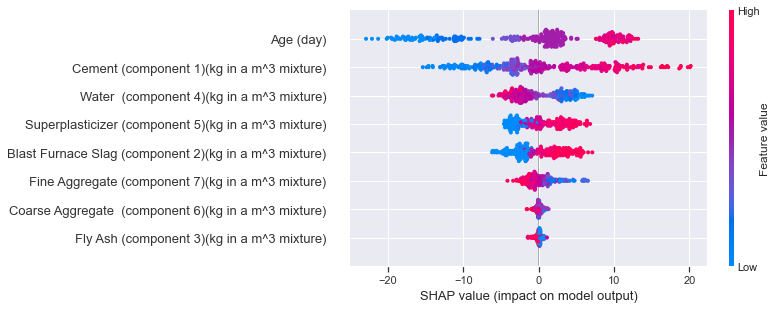

In [89]:
shap.summary_plot(shap_values, x_test)